In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Brake Reliability
A reliability engineer wants to compare the failure rate for two different types of a brake component that is used on subway trains. The engineer collects replacement time data and component type for 29 trains. Each time a unit failed, it was repaired and returned to service.

## 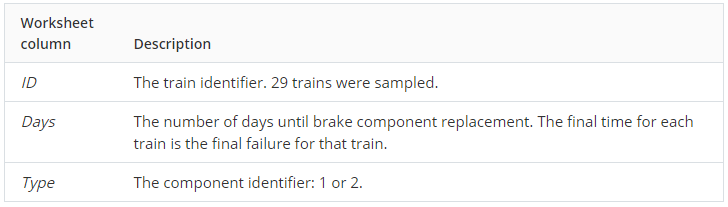

### 1.1 Data Visualizing 

In [2]:
BR_df = pd.read_excel('BrakeReliability.xlsx')
BR_df.head() # 데이터 확인

,ID,Days,Type
0,101,462,1
1,101,730,1
2,112,364,1
3,112,391,1
4,112,548,1


In [3]:
BR_df_ = BR_df[ ['Days','Type'] ] # ID 제외한 데이터 값 추출
BR_df_.head()

,Days,Type
0,462,1
1,730,1
2,364,1
3,391,1
4,548,1


In [4]:
BR_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
Days    79 non-null int64
Type    79 non-null int64
dtypes: int64(2)
memory usage: 1.3 KB


In [5]:
BR_df_.describe()

,Days,Type
count,79.000000,79.000000
mean,397.594937,1.518987
std,207.967238,0.502832
min,19.000000,1.000000
25%,246.000000,1.000000
50%,419.000000,2.000000
75%,507.000000,2.000000
max,730.000000,2.000000


In [6]:
BR_df_['Days']

0     462
1     730
2     364
3     391
4     548
5     724
6     302
7     444
8     500
9     730
10    250
11    500
12    724
13     88
14    724
15    272
16    421
17    552
18    625
19    719
20    481
21    710
22    431
23    710
24    367
25    710
26    635
27    650
28    708
29    402
     ... 
49     91
50    119
51    148
52    306
53    461
54    382
55    460
56    250
57    434
58    192
59    448
60    369
61    448
62     22
63    447
64     54
65    441
66    194
67    432
68     61
69    419
70     19
71    185
72    419
73    187
74    416
75     93
76    205
77    264
78    415
Name: Days, Length: 79, dtype: int64

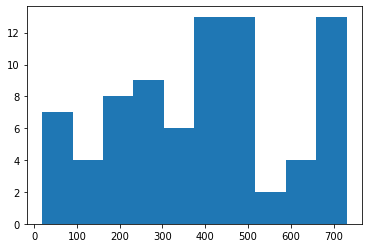

In [7]:
plt.hist(BR_df_['Days']) # 데이터 히스토그램
plt.show()

1     Days  Type
0    462     1
1    730     1
2    364     1
3    391     1
4    548     1
5    724     1
6    302     1
7    444     1
8    500     1
9    730     1
10   250     1
11   500     1
12   724     1
13    88     1
14   724     1
15   272     1
16   421     1
17   552     1
18   625     1
19   719     1
20   481     1
21   710     1
22   431     1
23   710     1
24   367     1
25   710     1
26   635     1
27   650     1
28   708     1
29   402     1
30   700     1
31    33     1
32   687     1
33   287     1
34   687     1
35   317     1
36   498     1
37   657     1


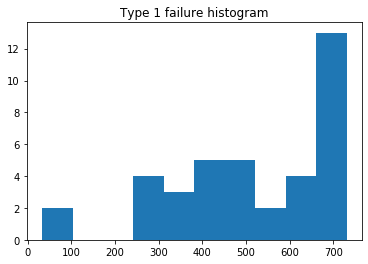

2     Days  Type
38   203     2
39   211     2
40   277     2
41   373     2
42   511     2
43   293     2
44   503     2
45   173     2
46   242     2
47   464     2
48    39     2
49    91     2
50   119     2
51   148     2
52   306     2
53   461     2
54   382     2
55   460     2
56   250     2
57   434     2
58   192     2
59   448     2
60   369     2
61   448     2
62    22     2
63   447     2
64    54     2
65   441     2
66   194     2
67   432     2
68    61     2
69   419     2
70    19     2
71   185     2
72   419     2
73   187     2
74   416     2
75    93     2
76   205     2
77   264     2
78   415     2


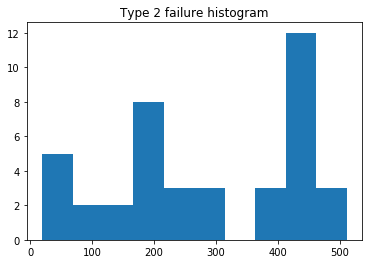

In [8]:
grouped = BR_df_.groupby('Type') ## 유형 별 히스토그램
for type_,group in grouped:
    print(type_,group)
    plt.hist(group['Days'])
    plt.title('Type {0} failure histogram'.format(type_))
    plt.show()

### 1.2 Reliability figures with Data

#### 타입 별 MTTF, B25수명 및 F(t), R(t), f(t), h(t)

In [9]:
## 신뢰성 척도 측정을 위한 데이터 준비
type1_item = BR_df_[BR_df_['Type']==1]['Days']
type2_item = BR_df_[BR_df_['Type']==2]['Days']

In [10]:
type1_item.describe()

count     38.000000
mean     519.473684
std      191.394843
min       33.000000
25%      393.750000
50%      524.000000
75%      706.000000
max      730.000000
Name: Days, dtype: float64

In [11]:
type2_item.describe()

count     41.000000
mean     284.634146
std      152.521434
min       19.000000
25%      185.000000
50%      277.000000
75%      432.000000
max      511.000000
Name: Days, dtype: float64

### 1.2.1 MTTF 

In [12]:
## 타입별 평균수명  

type1_MTTF = type1_item.describe()['mean']
type2_MTTF = type2_item.describe()['mean']

print('type1_MTTF : ',type1_MTTF)
print('type2_MTTF : ',type2_MTTF)

type1_MTTF :  519.4736842105264
type2_MTTF :  284.6341463414634


### 1.2.2 B25 수명 

In [13]:
## 타입별 1/4분위선

type1_B25 = type1_item.describe()['25%']
type2_B25 = type2_item.describe()['25%']

print('type1_B25 : ',type1_B25)
print('type2_B25 : ',type2_B25)

type1_B25 :  393.75
type2_B25 :  185.0


In [14]:
# 신뢰성 척도 계산을 위한 누적고장갯수 작성
index = ['({0}:{1}]'.format(t,t+50) for t in range(0,750,50)]

cdf = pd.DataFrame(index=index,columns=['Type 1','Type 2'])

In [15]:
for i,t in zip(cdf.index,range(0,750,50)):
    cdf.loc[i,'Type 1'] = sum(type1_item<t+50)
    cdf.loc[i,'Type 2'] = sum(type2_item<t+50)

In [16]:
cdf

,Type 1,Type 2
(0:50],1,3
(50:100],2,7
(100:150],2,9
(150:200],2,14
(200:250],2,18
(250:300],5,22
(300:350],7,23
(350:400],10,26
(400:450],14,36
(450:500],17,39


### 1.2.3 누적확률분포 (불신뢰도 F(t) 함수) 

# 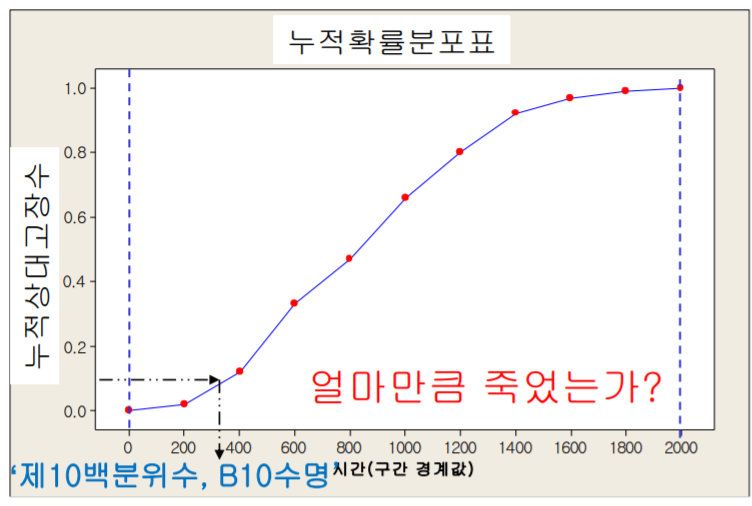

In [17]:
t = range(0,800,50)

type1_Ft = [0]+[x/len(type1_item) for x in cdf['Type 1']]
type2_Ft = [0]+[x/len(type2_item) for x in cdf['Type 2']]

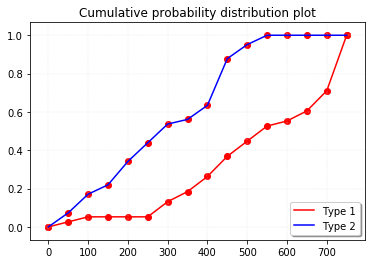

In [18]:
plt.plot(t,type1_Ft, color = 'r',label = 'Type 1')
plt.plot(t,type2_Ft, color = 'b',label = 'Type 2')

plt.scatter(t,type1_Ft, color = 'r')
plt.scatter(t,type2_Ft, color = 'r')

plt.title('Cumulative probability distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower right')
plt.show()

### 1.2.4 누적확률분포 (신뢰도 R(t) 함수)

# 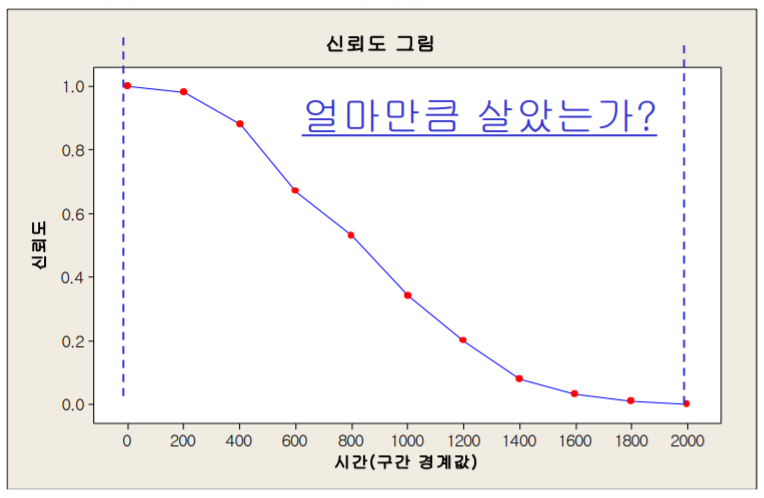

In [19]:
t = range(0,800,50)
type1_Rt = [1]+[1-x/len(type1_item) for x in cdf['Type 1']]
type2_Rt = [1]+[1-x/len(type2_item) for x in cdf['Type 2']]

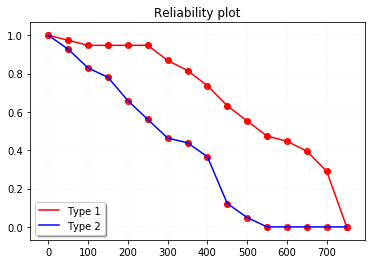

In [20]:
plt.plot(t,type1_Rt, color = 'r',label = 'Type 1')
plt.plot(t,type2_Rt, color = 'b',label = 'Type 2')

plt.scatter(t,type1_Rt, color = 'r')
plt.scatter(t,type2_Rt, color = 'r')

plt.title('Reliability plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower left')
plt.show()

### 1.2.5 고장밀도함수 (f(t) 함수) 

In [21]:
t = [t_+25 for t_ in range(0,750,50)]

type1_ft=[cdf.iloc[0,0]/(len(type1_item)*50)]

for i in range(len(cdf.index))[1:]:
    type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/len(type1_item)*50)
    
type2_ft=[cdf.iloc[0,1]/(len(type2_item)*50)]

for i in range(len(cdf.index))[1:]:
    type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/len(type2_item)*50)

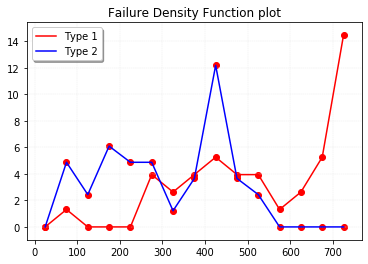

In [22]:
plt.plot(t,type1_ft, color = 'r',label = 'Type 1')
plt.plot(t,type2_ft, color = 'b',label = 'Type 2')

plt.scatter(t,type1_ft, color = 'r')
plt.scatter(t,type2_ft, color = 'r')

plt.title('Failure Density Function plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

### 1.2.6 순간고장률 (h(t) 함수) 

# 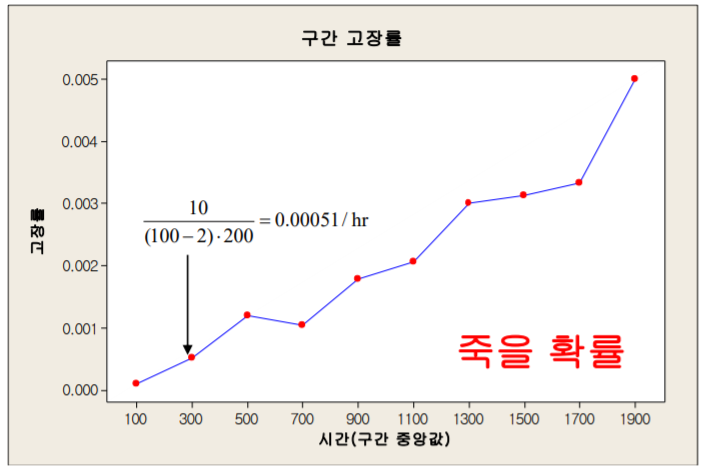

In [23]:
t = [t_+25 for t_ in range(0,750,50)]

type1_failure = 0
type1_ht=[cdf.iloc[0,0]/(len(type1_item)*50)]
for i in range(len(cdf.index))[1:]:
    type1_ht.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/((len(type1_item)-type1_failure)*50))
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ht=[cdf.iloc[0,1]/(len(type2_item)*50)]
for i in range(len(cdf.index))[1:]:
    type2_ht.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/((len(type2_item)-type2_failure)*50))
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]

In [24]:
type2_ht

[0.0014634146341463415,
 0.001951219512195122,
 0.001081081081081081,
 0.002857142857142857,
 0.0026666666666666666,
 0.003076923076923077,
 0.0009090909090909091,
 0.002857142857142857,
 0.011111111111111112,
 0.0075,
 0.008,
 0.0,
 0.0,
 0.0,
 0.0]

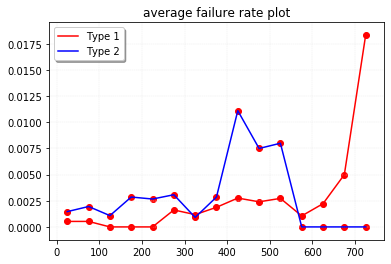

In [25]:
plt.plot(t,type1_ht, color = 'r',label = 'Type 1')
plt.plot(t,type2_ht, color = 'b',label = 'Type 2')

plt.scatter(t,type1_ht, color = 'r')
plt.scatter(t,type2_ht, color = 'r')

plt.title('average failure rate plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

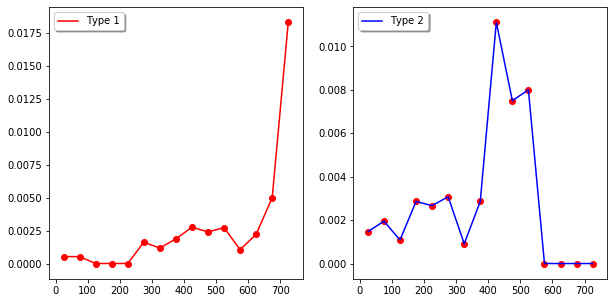

In [26]:
fig = plt.figure()
fig.set_size_inches(10,5) # 크기지정
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)

ax_1.plot(t,type1_ht, color = 'r',label = 'Type 1')
ax_1.scatter(t,type1_ht, color = 'r')
ax_1.legend(shadow=True,fancybox=True,loc='upper left')

ax_2.plot(t,type2_ht, color = 'b',label = 'Type 2')
ax_2.scatter(t,type2_ht, color = 'r')
ax_2.legend(shadow=True,fancybox=True,loc='upper left')

plt.show()